In [1]:
using Scical

In [2]:
using PyPlot

In [3]:
using LsqFit

In [4]:
counts = readcsv("Cs_sidebands_Counts.csv");
detuning = readcsv("Cs_sidebands_Det.csv");
param_list = readcsv("Cs_sidebands_ParamList.csv");
single_atom = readcsv("Cs_sidebands_SingleAtom.csv");

In [5]:
function sort_data(counts, detuning, param_list, single_atom)
    z_α = 1
    total_count = Dict{Float64, Int}()
    survive_count = Dict{Float64, Int}()
    for i in 1:length(param_list)
        param = param_list[i]
        if single_atom[2i - 1] == 0
            continue
        end
        total_count[param] = get(total_count, param, 0.0) + 1.0
        survive_count[param] = get(survive_count, param, 0.0) + single_atom[2i]
    end
    xs = Float64[]
    ys = Float64[]
    ss = Float64[]
    for key in keys(total_count)
        push!(xs, key)
        survive = survive_count[key]
        total = total_count[key]
        _mean = (survive + z_α^2 / 2) / (total + z_α^2)
        _unc = z_α * √(survive * (total - survive) / total + z_α^2 / 4) / (total + z_α^2)
        push!(ys, _mean)
        push!(ss, _unc)
    end
    p = sortperm(xs)
    xs[p], ys[p], ss[p]
end

sort_data (generic function with 1 method)

In [6]:
xs, ys, ss = sort_data(counts, detuning, param_list, single_atom);

In [7]:
dets = (xs - detuning[1]) / 1e6;

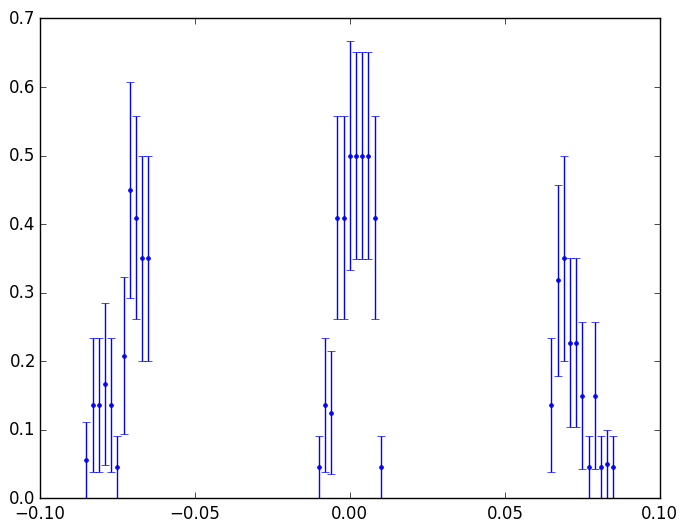

(PyObject <matplotlib.lines.Line2D object at 0x7f0c64f8e7f0>,(PyObject <matplotlib.lines.Line2D object at 0x7f0c64f8e470>,PyObject <matplotlib.lines.Line2D object at 0x7f0c64f8e828>),(PyObject <matplotlib.collections.LineCollection object at 0x7f0c64f81780>,))

In [8]:
errorbar(dets, ys, ss, fmt=".")

In [9]:
i1 = dets .< -0.05;
i2 = -0.05 .< dets .< 0.05;
i3 = dets .> 0.05;

In [10]:
model(x, p) = p[1] .* exp(-((x - p[2]) ./ p[3]).^2)

model (generic function with 1 method)

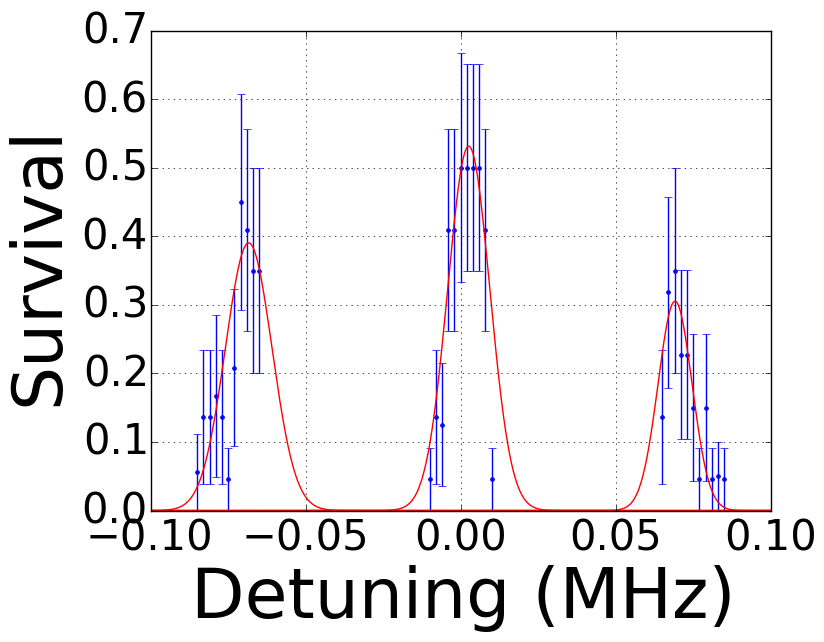

In [11]:
fit1 = curve_fit(model, dets[i1], ys[i1], ss[i1], [0.1, -0.07, 0.01])
fit2 = curve_fit(model, dets[i2], ys[i2], ss[i2], [0.1, 0.0, 0.01])
fit3 = curve_fit(model, dets[i3], ys[i3], ss[i3], [0.1, 0.07, 0.01])
plotx = linspace(-0.1, 0.1, 1000)
errorbar(dets, ys, ss, fmt="b.")
plot(plotx, model(plotx, fit1.param), "r")
plot(plotx, model(plotx, fit2.param), "r")
plot(plotx, model(plotx, fit3.param), "r")
xlim([-0.1, 0.1])
ylabel("Survival"; size=50)
xlabel("Detuning (MHz)"; size=50)
for label in [gca()[:get_xticklabels](); gca()[:get_yticklabels]()]
    label[:set_fontsize](30)
end
grid()
savefig("Cs_sideband.png"; bbox_inches="tight")